# Question 3

## * Important information

### -<span style="color:blue">Use self organizing maps as a substitute for K-means. </span>
### -<span style="color:green">Sample the data to include only images of '1' and '5' using sk-learn to load the data.</span>
### -<span style="color:orange">Document the dimension of the SOM computed and the learning parameters used to generate it</span>
### -<span style="color:purple">Provide 2D plot of the regions for '1' and '5' for both SOM and K-means solutions.</span>

## * <span style="color:red">Import Libraries</span>

In [10]:
import numpy as np # Library for scientific computations, we are mainly using it for creating arrays.
import matplotlib.pyplot as plt # Allows us to plot diagrams
import matplotlib.patches as patches # Extra plotting functionality
from minisom import MiniSom # Library has an implementation of a minimilistic SOM algorithm
from random import shuffle # Used to shuffle the dataset as two list ones and fives.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

### -<span style="color:green">Sample the data to include only images of '1' and '5' using sk-learn to load the data.</span>

Iris is the well-known Fisher's Iris data set. He measured the length and width of the sepal and petal (two parts of the flower) of three species of Iris. Each row contains the measurements from one flower and there are measurements for 50 flowers of each type, hence the dimensions of iris.data. The actual type of the flower is coded as 0, 1, or 2 in iris.target; you can recover the actual species names (as strings) from iris.target_name.

Fisher showed that his then-new discriminant method could separate the three species based on their sepal and petal measurements and it's been a standard classification data set ever since.

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.cache')
list_of_types = mnist.target.tolist() ## refer the paragpraph above the target allows you to choose the type of data you want
                          ## We need as a list to partition it

def partition_the_list(label):
    return [(x, label) for x in mnist.data[list_of_types.index(label) : list_of_types.index(label + 1)]]


#Getting a dataset of ones and fives as a tuple
ones = partition_the_list(1)
fives = partition_the_list(5)

dataset = ones + fives
shuffle(dataset)
df = pd.DataFrame(dataset)
df.head()

,0,1
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5


### -<span style="color:orange">Document the dimension of the SOM computed and the learning parameters used to generate it</span>

       dim: A rule of thumb to set the size of the grid for a dimensionality
            reduction task is that it should contain 5*sqrt(N) neurons
            where N is the number of samples in the dataset to analyze.
            
       sigma : float, optional (default=1.0)
            Spread of the neighborhood function, needs to be adequate
            to the dimensions of the map.

In [4]:
dim = int(np.sqrt(5*np.sqrt(len(dataset))))
x_dim = dim
y_dim = dim
input_len = 784
sigma = 0.9
learning_rate = .20

som = MiniSom(x_dim, y_dim, input_len, sigma=sigma, learning_rate=learning_rate)

### -<span style="color:purple">Provide 2D plot of the regions for '1' and '5' for  SOM.</span>

In [5]:
def som_plot(title):
    plt.figure(figsize=(5, 5))

    for index, item in enumerate(dataset):
        image, label = item
        i, j = som.winner(image)
        plt.text(i, j, str(label), color=plt.cm.Dark2_r(label / 5.), fontdict={'size': 11})
    plt.axis([0, x_dim, 0, y_dim])
    plt.title(title)
    plt.show()

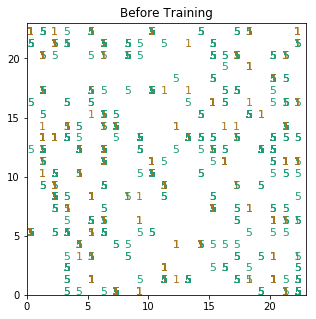

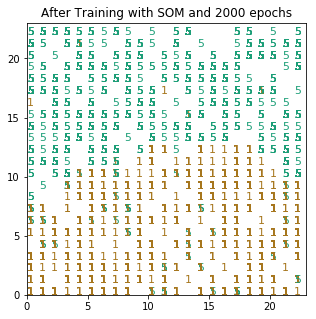

In [6]:
som_plot('Before Training')
epochs = 2000
som.train_random([i[0] for i in dataset[:1024]], epochs)
som_plot('After Training with SOM and %s epochs' % epochs)

### -<span style="color:purple">Provide 2D plot of the regions for '1' and '5' for K-means solutions.</span>

In [14]:
def min_max(np_arr):
    return [np_arr.min() - 1, np_arr.max() + 1]

rd = PCA(n_components=2).fit_transform([scale(x[0].astype(float)) for x in dataset[:1024]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(rd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

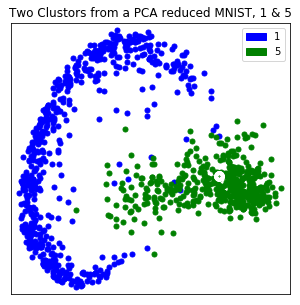

In [15]:
plt.figure(figsize=(5, 5))

x_min, x_max = min_max(rd[:,0])
y_min, y_max = min_max(rd[:,1])


legend = []
for label, color in [(1, 'blue'), (5, 'green')]:    
    _ = np.array([rd[i] for i in range(1024) if dataset[i][1] is label])
    plt.plot(_[:, 0], _[:, 1], 'k.', markersize=10, color=color)
    legend.append(patches.Patch(color=color, label=str(label)))

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=1, color='w', zorder=10, marker='*', linewidth=10)
plt.title('Two Clustors from a PCA reduced MNIST, 1 & 5')
plt.legend(handles=legend)
plt.xticks([])
plt.yticks([])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()